## SVD in code
Packages used:
1. `numpy.linalg.svd`: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

2. `imageio`: https://imageio.readthedocs.io/en/stable/examples.html#read-from-fancy-sources

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
import inspect
# print(inspect.getsource(np.linalg.svd))

(898, 934, 3)


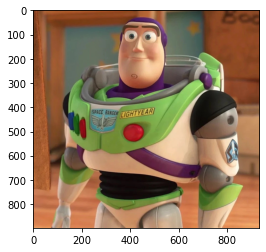

In [27]:
# read a buzz lightyear image
img = iio.imread('../assets/img/buzz_lightyear.jpg')

# print shape of the original image
print(img.shape)
plt.imshow(img[:,:,:], cmap=plt.cm.gray)
plt.show()

We can reduce the image channels from 3 to 1 first, to simplify the original matrix ($X$):

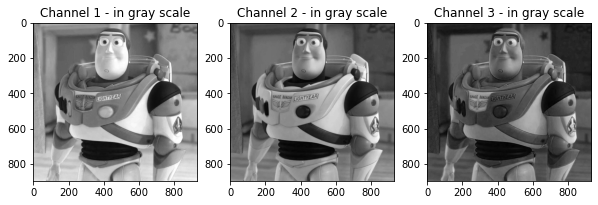

In [62]:
fig, axes = plt.subplots(1, 3, figsize = (10, 4))
axes[0].imshow(img[:,:,0], cmap=plt.cm.gray)
axes[1].imshow(img[:,:,1], cmap=plt.cm.gray)
axes[2].imshow(img[:,:,2], cmap=plt.cm.gray)
axes[0].set_title('Channel 1 - in gray scale')
axes[1].set_title('Channel 2 - in gray scale')
axes[2].set_title('Channel 3 - in gray scale')
plt.show()

In [45]:
# Narrow down to just channel 1 image
img_channel_1 = img[:,:,0]

# decompose X with SVD
U, s, Vh = np.linalg.svd(img_channel_1, full_matrices=True)
U.shape, s.shape, Vh.shape

((898, 898), (898,), (934, 934))

In [53]:
def svd_decomposed_img(k, U, s, Vh):
    '''
    Recompose X with different k values: 
    k is the number of important eigenvectors in subtracting original img info
    '''
    U = U[:, :k]
    s = s[:k]
    Vh = Vh[:k, :]
    
    sigma = np.diag(s)
    X = np.dot(np.dot(U, sigma), Vh)
    
    return X

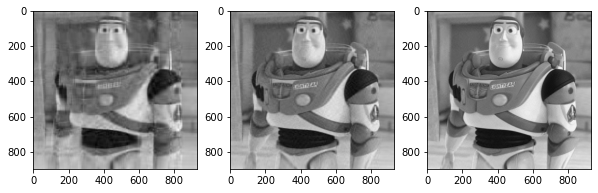

In [60]:
# print out a bunch of decomposed img with different k
X = list()
for k in [20, 50, 100]:
    X.append(svd_decomposed_img(k, U, s, Vh))

fig, axes = plt.subplots(1, 3, figsize = (10, 4))
axes[0].imshow(X[0], cmap=plt.cm.gray)
axes[1].imshow(X[1], cmap=plt.cm.gray)
axes[2].imshow(X[2], cmap=plt.cm.gray)
axes[0].set_title('Channel 1 - in gray scale (k = 20)')
axes[1].set_title('Channel 1 - in gray scale (k = 50)')
axes[2].set_title('Channel 1 - in gray scale (k = 100)')
plt.show()